<div class="alert alert-block alert-danger">

#### Student Name: Anon Pipatpakin
#### Student ID: 33366829
# Perceptorn vs Neural Networks
    

</div>

<div class="alert alert-block alert-info">
    
## Libaries

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import zero_one_loss

## Question 2

**I.** Load Task2B train.csv and Task2B test.csv datasets, plot the training and testing data separately in two plots. Mark the data with different labels in different colors.


In [2]:
# load data
train = pd.read_csv("Task2B_train.csv")
test = pd.read_csv("Task2B_test.csv")

**plotiting traning dataset**

Text(0.5, 1.0, 'Training Dataset')

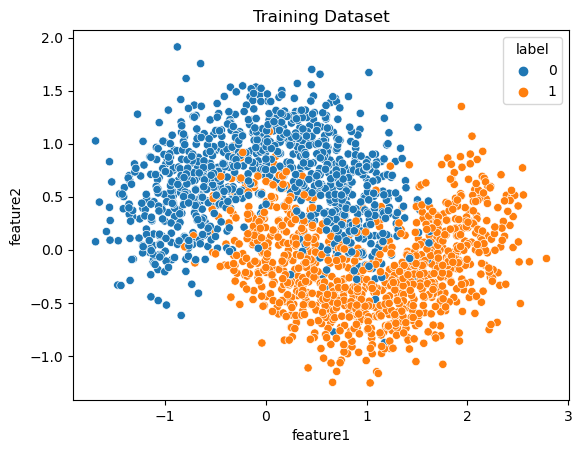

In [3]:
# plotting scatter plot
sns.scatterplot(data= train, x= "feature1", y= "feature2", hue= "label")
plt.title("Training Dataset")

**plotting testing dataset**

Text(0.5, 1.0, 'Testing Dataset')

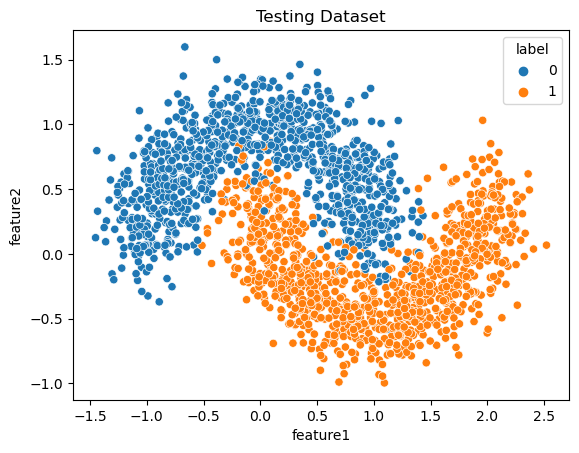

In [4]:
sns.scatterplot(data= test, x= "feature1", y= "feature2", hue= "label")
plt.title("Testing Dataset")

-------------------------------

**II.** Train two Perceptron models on the loaded training data by setting the learning rates η to
0.1 and 1.0 respectively. Calculate the test errors of two models and find the best η and its
corresponding model, then plot the decision boundary and the test data in one plot. Hint:
We expect the decision boundary of your perceptron to be a linear function that separates
the testing data into two parts. You may also choose to change the labels from [0, 1] to [-1,
+1] for your convenience.

In [5]:
# set learning rate
rate_1 = 0.1
rate_2 = 1

**Define functions**

In [6]:
class Perceptron:
    
    def __init__(self, eta=0.01, tau_max=10000, epsilon=0.005, random_state=None):
        self.eta = eta   # learning rate
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon   # tolerable error
        self.random_state = random_state

    def fit(self, x, y):
        RNG = np.random.default_rng(self.random_state)
        n, p = x.shape

        self.w_trace_ = np.empty((self.tau_max, p))     # trace of weights during training
        self.xy_idx_trace_ = np.empty(self.tau_max, int) # trace of considered training point indices
        
        # initialisation of iteration counter and weights
        tau = 0 
        self.w_ = self.w_trace_[0,:] = RNG.normal(size=p) 
        terminate = False
        while not (terminate or (self.predict(x)!=y).mean()<self.epsilon):
            # random order to consider training data
            order = RNG.choice(np.arange(n),size = n ,replace = False)
            for i in range(n):
                if self.predict(x[order][i]) != y[order][i]:
                    self.w_ = self.w_ + (2*y[order][i]-1)*self.eta * x[order][i]
                
                self.w_trace_[tau+1] = self.w_
                self.xy_idx_trace_[tau] = order[i]

                tau +=1
                if tau == self.tau_max-1:
                    terminate = True
                    break
        
        # remove empty rows from traces
        self.w_trace_ = self.w_trace_[:tau] 
        self.xy_idx_trace_ = self.xy_idx_trace_[:tau-1]

        return self

    def predict(self, x):
        return (x.dot(self.w_) >= 0).astype(int)

In [7]:
def scatter_data_by_target_value(x, y, ax=None, scatter_params={'ec': 'black', 'alpha': 0.8}):
    ax = plt.gca() if ax is None else ax
    for c in range(2):
        x1_c = x[y==c, 0]
        x2_c = x[y==c, 1]
        ax.scatter(x1_c, x2_c, label=f'$c={c}$', **scatter_params)
    ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
def plot_line(slope, intercept, ax=None, shape='--', **kwargs):
    ax = plt.gca() if ax is None else ax
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.set_ylim(ax.get_ylim())
    ax.set_xlim(ax.get_xlim())
    ax.plot(x_vals, y_vals, shape, **kwargs)

def plot_decision_boundary_from_weights(weights, ax=None):
    slope = -weights[0]/weights[1]
    intercept = 0
    plot_line(slope, intercept, ax, shape='--', color='red')

**Train model**

In [8]:
perceptron_1 = Perceptron(eta= rate_1, random_state=1)
perceptron_1.fit(x=np.array(train[["feature1", "feature2"]]), y= np.array(train["label"]))

In [9]:
perceptron_2 = Perceptron(eta= rate_2, random_state=1)
perceptron_2.fit(x=np.array(train[["feature2", "feature2"]]), y= np.array(train["label"]))

**Calulate Error and Plot Decision Boundary**

In [10]:
# test error
test_error_1 = zero_one_loss(perceptron_1.predict(x= np.array(test[["feature1", "feature2"]])), y_pred= test["label"])
test_error_2 = zero_one_loss(perceptron_2.predict(x= np.array(test[["feature1", "feature2"]])), y_pred= test["label"])

print(f"Test erro with eta={rate_1} is {test_error_1}")
print(f"Test erro with eta={rate_2} is {test_error_2}")

Test erro with eta=0.1 is 0.21750000000000003
Test erro with eta=1 is 0.665


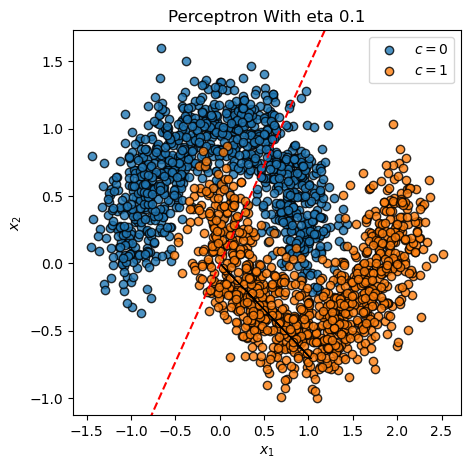

In [11]:
plt.figure(figsize=(5, 5))
scatter_data_by_target_value(x=np.array(test[["feature1", "feature2"]]), y= np.array(test["label"]))
plt.arrow(0, 0, *(perceptron_1.w_*5))
plot_decision_boundary_from_weights(perceptron_1.w_)
plt.title("Perceptron With eta 0.1")
plt.show()

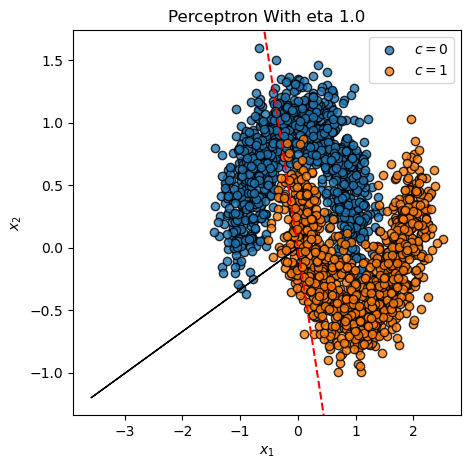

In [12]:
plt.figure(figsize=(5, 5))
scatter_data_by_target_value(x=np.array(test[["feature1", "feature2"]]), y= np.array(test["label"]))
plt.arrow(0, 0, *(perceptron_2.w_*5))
plot_decision_boundary_from_weights(perceptron_2.w_)
plt.title("Perceptron With eta 1.0")
plt.show()

---------------------------------

**III.** For each combination of K (i.e, number of units in the hidden layer) in 5, 10, 15, ..., 40, (i.e.
from 5 to 40 with a step size of 5), and η (i.e., learning rate) in 0.01, 0.001 run the 3-layer
Neural Network and record testing error for each of them. Plot the effect of different K values
on the accuracy of the testing data. Based on this plot, find the best combination of K and η
and obtain your best model, then plot the decision boundary and the test data in one plot.

**Define functions for neural network**

In [13]:
# function for activate function
def h(z):
    return 1/ (1+ np.exp(-3*z))

# differentiate function
def h_d(z):
    return (h(z) * (1- h(z)))

# mean accuracy function
def accuracy(pred, label):
    return (pred == label).mean()

# feed forwrd function
def feedforward(Xi, Ti, W1, b1, W2, b2):
    a1 = Xi
    y = Ti
    
    # second layer
    z2 = a1 @ W1 + b1
    a2 = h(z2)
    # third layer
    z3 = a2 @ W2 + b2
    a3 = h(z3)
    
    return(a1, a2, a3, y, z2, z3)

# backpropagation function
def backpropagation(Ti, W2, z2, z3, a3):
    ### 3rd (output) layer
    d3 = -(Ti-a3) * h_d(z3)                          
    ### 2nd (hidden) layer
    d2 =  (d3 @ W2.T) * h_d(z2)                          
    return(d2,d3)

# one more aux functions before we start
def prediction(X, W1, W2, b1, b2, threshold=0.5):
    # we use the feedforward network we defined to obtain output activation (a3), we don't care about the
    # rest so we use _ to store them. We also don't need to send T so we just send 1 instead
    _,_, a3,_,_,_ = feedforward(X, 1,W1,b1, W2, b2)
    return np.array([1 if above_thresh else 0 for above_thresh in (a3 >= threshold)]).reshape(-1,1)

In [14]:
def NN(K, X1, T1, X2, T2, epoch_max=500, seed=None, eta= 0.1):
    if seed is not None: np.random.seed(seed)
    # set parameters
    eta = eta # lerning rate
    alpha = 0.0001 # regularized term
    N, D = X1.shape
    
    # initialisation
    epoch = 1 # counter
    terminate = False
    
    W1 = np.random.normal(scale=0.5, size= (D, K))   
    b1 = np.zeros((1,K))
    W2 = np.random.normal(scale=0.5, size=(K,1))
    b2 = np.zeros((1,1))
    ## tracing accuracy of the model 
    train_accuracy = []
    test_accuracy = []
    
        # main loop
    while (not terminate):

        # note that this is the vectorised implementaion so it slightly differs from the above implementation
        # try to spot and rationalize the differences.
        ## Feedforward:
        a1, a2, a3, y, z2, z3 = feedforward(X1, T1, W1, b1, W2, b2)

        ## Backpropagation:
        d2, d3 = backpropagation(T1, W2, z2, z3, a3)

        ## calculate the delta values
        ### 1st layer
        W1_d = a1.T @ d2
        b1_d = d2
        ### 2nd layer
        W2_d = a2.T @ d3
        b2_d = d3

        ## update weight vectors and matrices
        ### 1st (input) layer
        W1 = W1 - eta * (W1_d/N + alpha*W1)
        b1 = b1 - eta * (b1_d.mean(axis=0, keepdims=True))
        ### 2nd (hidden) layer
        W2 = W2 - eta * (W2_d/N + alpha*W2)
        b2 = b2 - eta * (b2_d.mean(axis=0, keepdims=True))

        ## trace train  and test accuracy
        train_accuracy.append(accuracy(prediction(X1, W1, W2, b1, b2), T1))
        test_accuracy.append(accuracy(prediction(X2, W1, W2, b1, b2), T2))
        ## increase the iteration counter
        epoch = epoch + 1

        ## check the termination criteria
        if (epoch >= epoch_max): terminate = True
    
    # return train. test accuracy and final parameters
    return (train_accuracy,test_accuracy, (W1, W2, b1, b2))

**Data preporcessing**

In [15]:
X1 = np.array(train[["feature1", "feature2"]])
T1 = np.array(train["label"]).reshape(-1, 1)

X2 = np.array(test[["feature1", "feature2"]])
T2 = np.array(test["label"]).reshape(-1, 1)

# number of observation and dimension
N = X1.shape[0]
D = X1.shape[1]

N, D

(2000, 2)

**Target parameters**

In [16]:
# create a seqence of number of hidden layer
K_number = np.arange(5, 45, 5)
eta_list = [0.01, 0.001]

In [17]:
# 0 row, 1 col
def hyperparam_sweep(X1, X2, T1, T2, neuron_count, reps, epoch_max, eta):
    res = np.zeros(shape=(len(neuron_count), reps, 2))
    for i, k in enumerate(neuron_count):
        for j in range(reps):
            print('neurons={0}, rep={1}, '.format(k, j), end='')

            train, test, _ = NN(k, X1, T1, X2, T2, epoch_max=epoch_max, eta= eta)

            print('train={0}, test={1}'.format(np.mean(train), np.mean(test)))

            res[i, j, :] = np.array([np.mean(train), np.mean(test)])
    return res


# repetition
reps = 5
# max iteration
epoch_max = 8000
# training model with different K and eta
res_eta1 = hyperparam_sweep(X1, X2, T1, T2, neuron_count=K_number, reps=reps, epoch_max=epoch_max, eta= 0.01)
res_eta2 = hyperparam_sweep(X1, X2, T1, T2, neuron_count=K_number, reps=reps, epoch_max=epoch_max, eta= 0.001)

neurons=5, rep=0, train=0.7907297162145269, test=0.8009688711088887
neurons=5, rep=1, train=0.7398530441305163, test=0.7359244905613201
neurons=5, rep=2, train=0.7813717964745593, test=0.7788631703962996
neurons=5, rep=3, train=0.8214017377172147, test=0.8221934616827102
neurons=5, rep=4, train=0.838834104263033, test=0.8496480185023131
neurons=10, rep=0, train=0.8075523815476935, test=0.8109083635454432
neurons=10, rep=1, train=0.8154879984998126, test=0.8187659082385298
neurons=10, rep=2, train=0.74660751343918, test=0.7449439304913114
neurons=10, rep=3, train=0.8097634079259907, test=0.8153982997874735
neurons=10, rep=4, train=0.8351752094011752, test=0.8437365920740092
neurons=15, rep=0, train=0.821116827103388, test=0.8219471808976122
neurons=15, rep=1, train=0.8508185398174772, test=0.8597440305038131
neurons=15, rep=2, train=0.665821665208151, test=0.6613861107638455
neurons=15, rep=3, train=0.7393072259032379, test=0.7462633454181774
neurons=15, rep=4, train=0.840682272784098, 

Text(0.5, 1.0, 'Accuracy vs Number of Neurons in Hidden Layer')

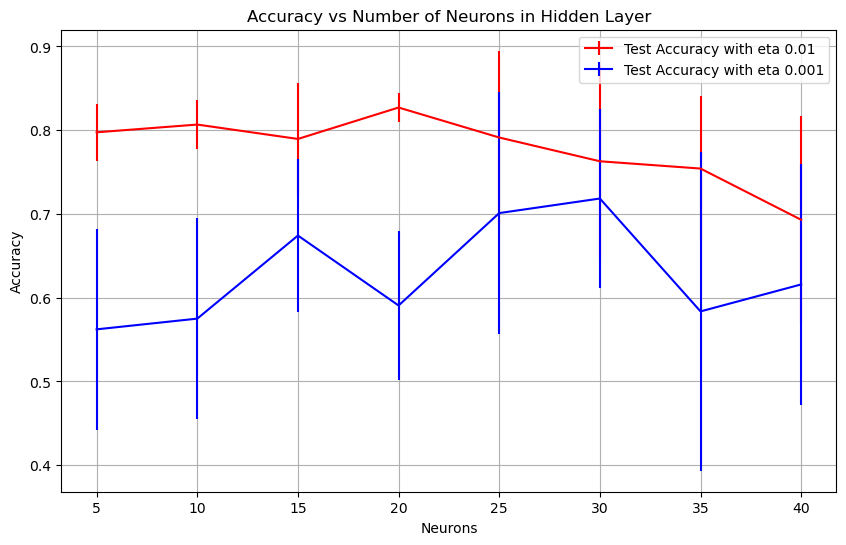

In [18]:
fig, axs = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(10)
res_eta1.shape

mu_s_1 = res_eta1.mean(axis=1)
ste_s_1 = 1.96*res_eta1.std(axis=1)/np.sqrt(reps)

mu_s_2 = res_eta2.mean(axis=1)
ste_s_2 = 1.96*res_eta2.std(axis=1)/np.sqrt(reps)


axs.errorbar(x=K_number, y=mu_s_1[:, 1], yerr=ste_s_1[:, 1], label='Test Accuracy with eta 0.01', c='r')
axs.errorbar(x=K_number, y=mu_s_2[:, 1], yerr=ste_s_2[:, 1], label='Test Accuracy with eta 0.001', c='b')

axs.legend()
axs.grid()
axs.set_xlabel('Neurons')
axs.set_ylabel('Accuracy')
axs.set_title('Accuracy vs Number of Neurons in Hidden Layer')

**K and $\eta$ selection**\
The plot above illustrats that the neural network models has the best performance with $\eta$ 0.01 and **K** 20. In addtion, the parameters' stadard error indicate low level of variance.

**Retrain model with $k= 20$, $\eta = 0.01$**

In [19]:
_, _, parameters = NN(20, X1, T1, X2, T2, epoch_max=100000, eta= 0.01)

In [20]:
W1 = parameters[0]
W2 = parameters[1]
b1 = parameters[2]
b2 = parameters[3]

In [21]:
accuracy(prediction(X2, W1, W2, b1, b2), T2)

0.9145

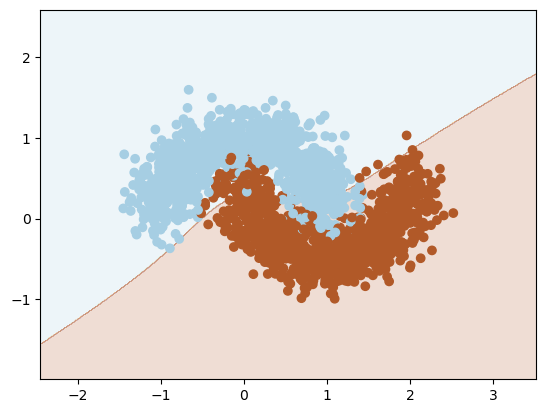

In [22]:
# Generate a grid of points
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Flatten the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid points
predictions = prediction(grid_points, W1=W1, b1=b1, W2=W2, b2=b2)

# Reshape predictions to match the grid shape
Z = predictions.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# Plot the data points
plt.scatter(X2[:, 0], X2[:, 1], c=T2, cmap=plt.cm.Paired)

plt.show()

**IV.** Explain the reason(s) responsible for such difference between Perceptron and a 3-layer Neural
Network by comparing the plots you generated in Steps II and III. Hint: Look at the plots
and think about the model assumptions.

**Answer**

Both models perceptron and neural netwrok have different assumtion about data as follow:
1. Perceptron: make an assumtion that classes are linerly separable.
2. Neural network: do not make assumtion about the linearly separable.

With these assumtions, we can see that perceptron perform poorly with the provided dataset which is not linearly separable. In the other hand, neural network is able to capture non-linear pattern of decision boundary with its neuron in the hidden layer, theoretically with more neurons the model will capture pattern more accurately.